In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
from sklearn import datasets
iris = datasets.load_iris()

In [5]:
iris_data = iris.data
iris_data = pd.DataFrame(iris_data, columns = iris.feature_names)
iris_data['class'] = iris.target

In [6]:
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [12]:
iris_data.shape

(150, 5)

In [13]:
iris_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


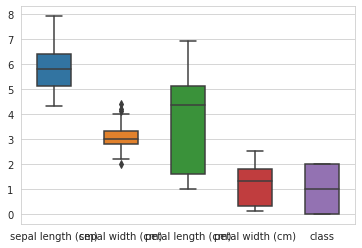

In [14]:
sns.boxplot(data = iris_data, width = 0.5, fliersize = 5)
sns.set(rc={'figure.figsize':(2,5)})

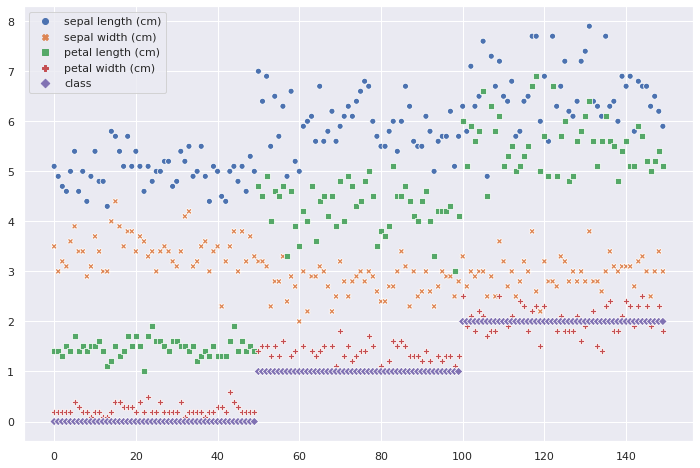

In [17]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data = iris_data)

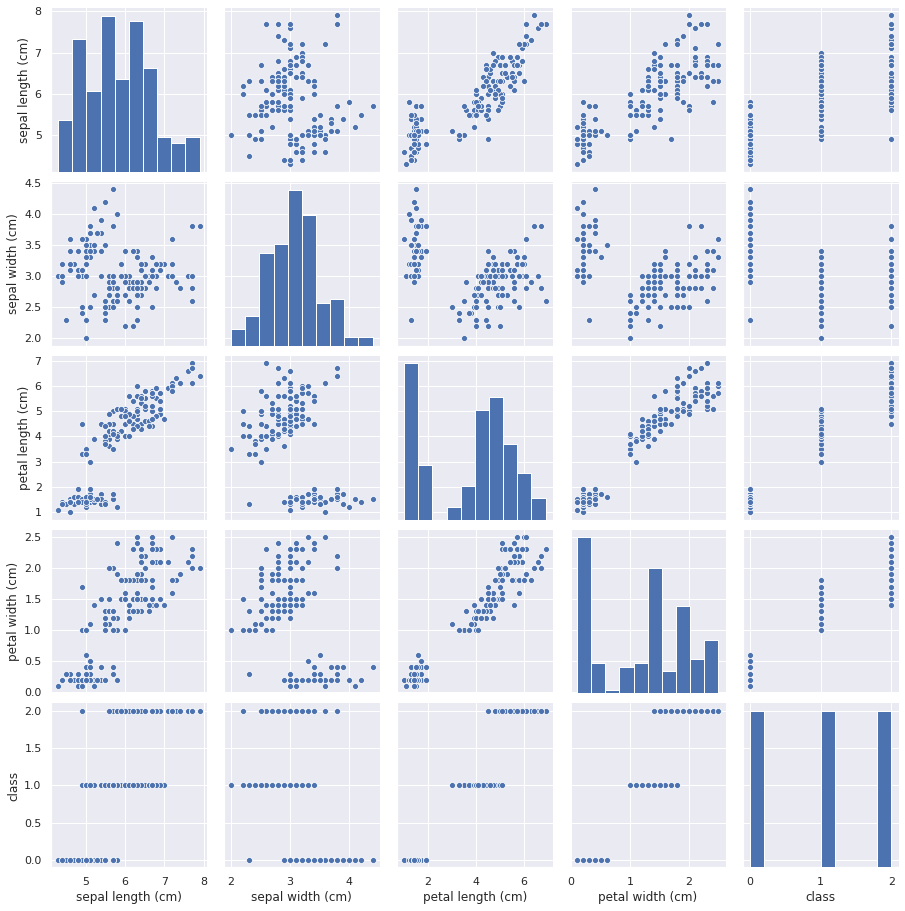

In [18]:
sns.pairplot(data = iris_data)

In [20]:
X = iris_data.values[:, 0:4]
y = iris_data.values[:,4]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3,
                                                    random_state = 101)

In [26]:
model = KNeighborsClassifier()

In [27]:
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [28]:
predictions  = model.predict(X_test)

In [31]:
print(accuracy_score(y_test, predictions)*100)

100.0


In [32]:
model = SVC()

In [33]:
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [34]:
predictions = model.predict(X_test)

In [35]:
print(accuracy_score(y_test, predictions)*100)

97.77777777777777


In [36]:
model = RandomForestClassifier()

In [37]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [38]:
predictions = model.predict(X_test)

In [39]:
print(accuracy_score(y_test, predictions)*100)

95.55555555555556


In [45]:
model = LogisticRegression()

In [46]:
model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
predictions = model.predict(X_test)

In [48]:
print(accuracy_score(y_test, predictions)*100)

97.77777777777777


In [53]:
model = RandomForestClassifier(n_estimators=1000)

In [54]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [55]:
predictions = model.predict(X_test)

In [56]:
print(accuracy_score(y_test, predictions))

0.9555555555555556


In [57]:
confusion_matrix(y_test, predictions)

array([[13,  0,  0],
       [ 0, 19,  1],
       [ 0,  1, 11]])

In [58]:
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n         0.0       1.00      1.00      1.00        13\n         1.0       0.95      0.95      0.95        20\n         2.0       0.92      0.92      0.92        12\n\n    accuracy                           0.96        45\n   macro avg       0.96      0.96      0.96        45\nweighted avg       0.96      0.96      0.96        45\n'